# **Projeto 1**
## Parte A

### Ler os 20 arquivos fornecidos, cada um a ser tratado como o vetor de atributo de um respectivo objeto, e realizar visualizações como sequência de valores e como histogramas. 

In [71]:
datas = []

for i in range(1,21):
    datas.append(pd.read_csv('./dados/dados_ '+str(i)+'', sep=" "))

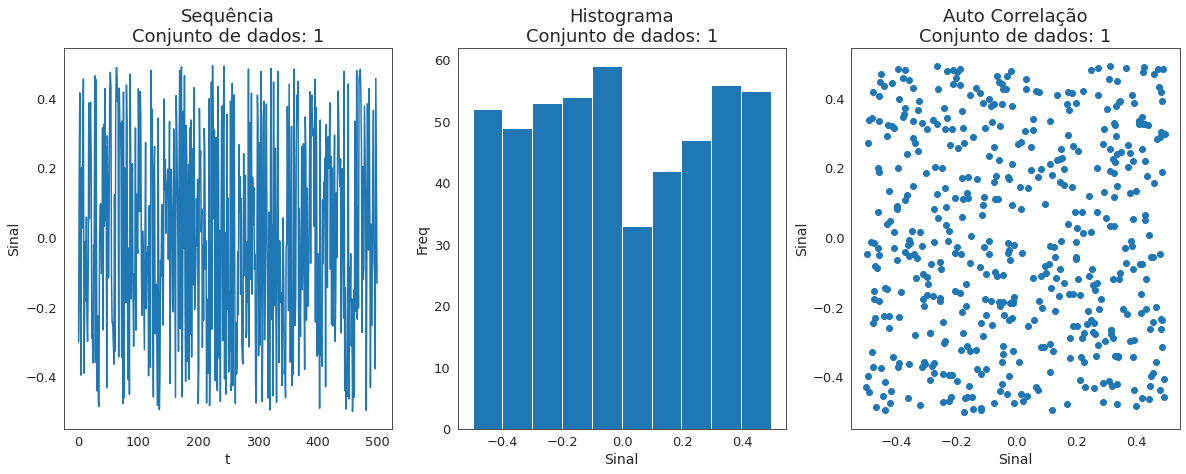

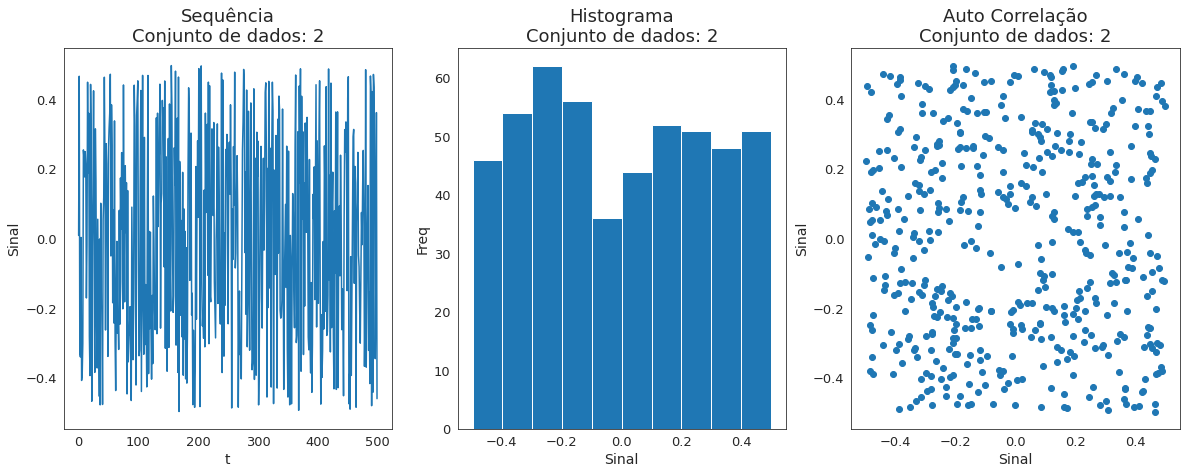

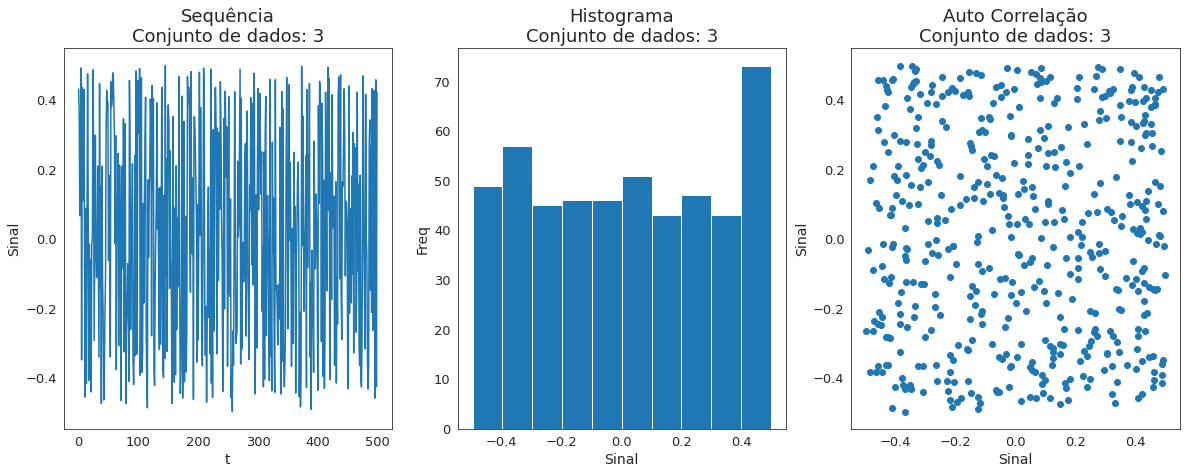

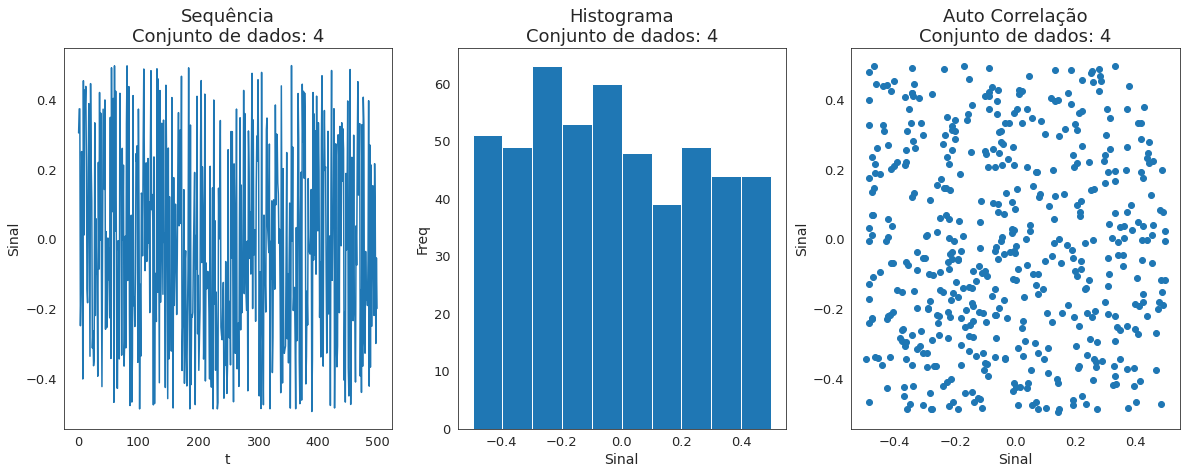

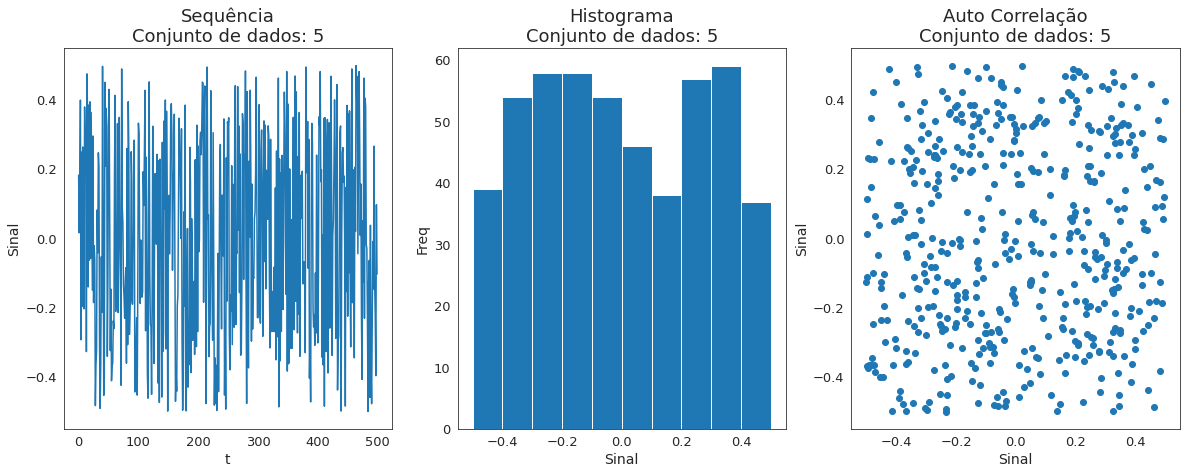

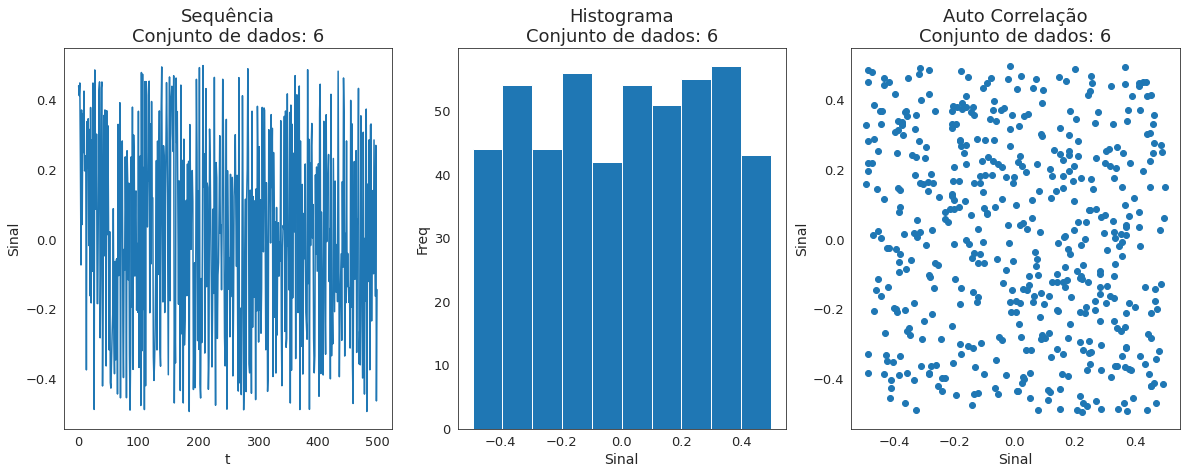

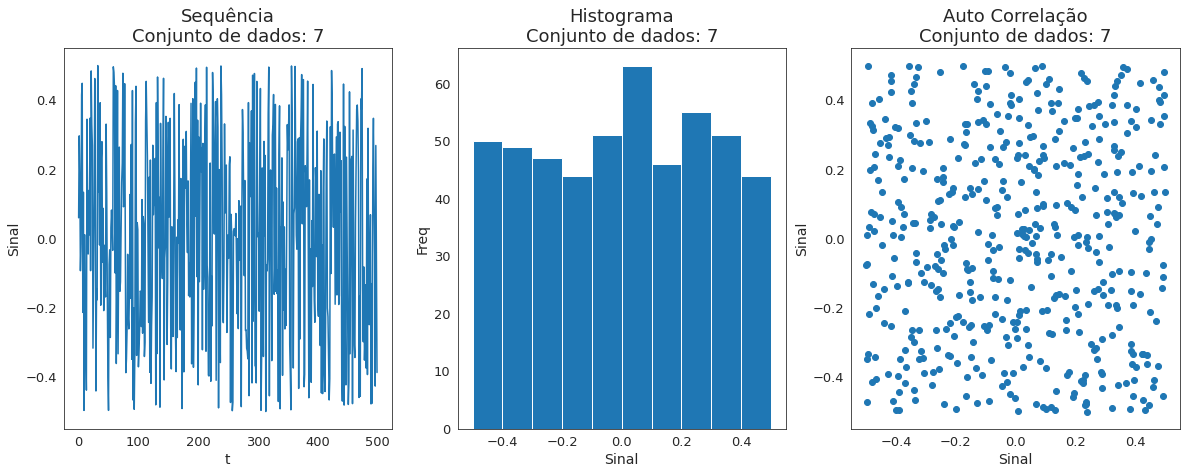

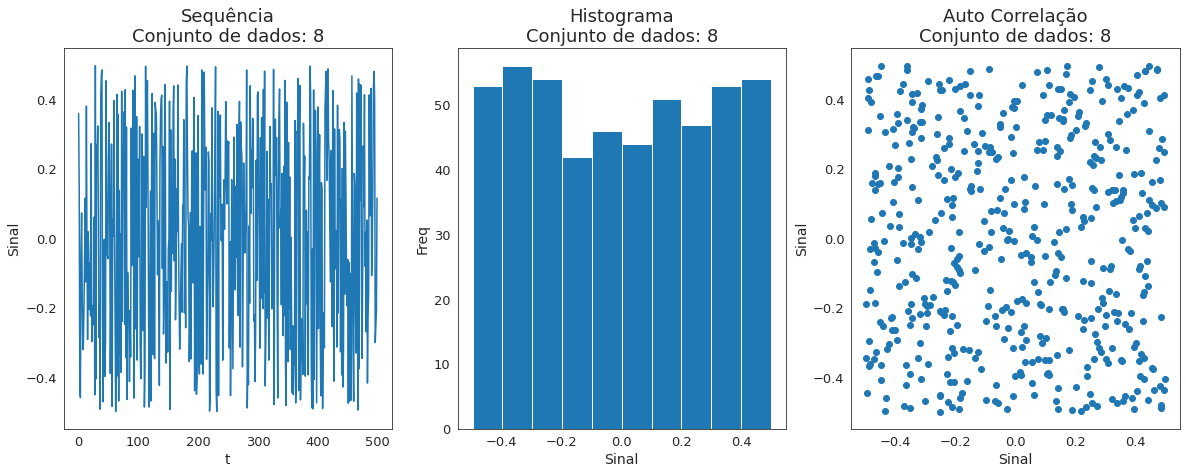

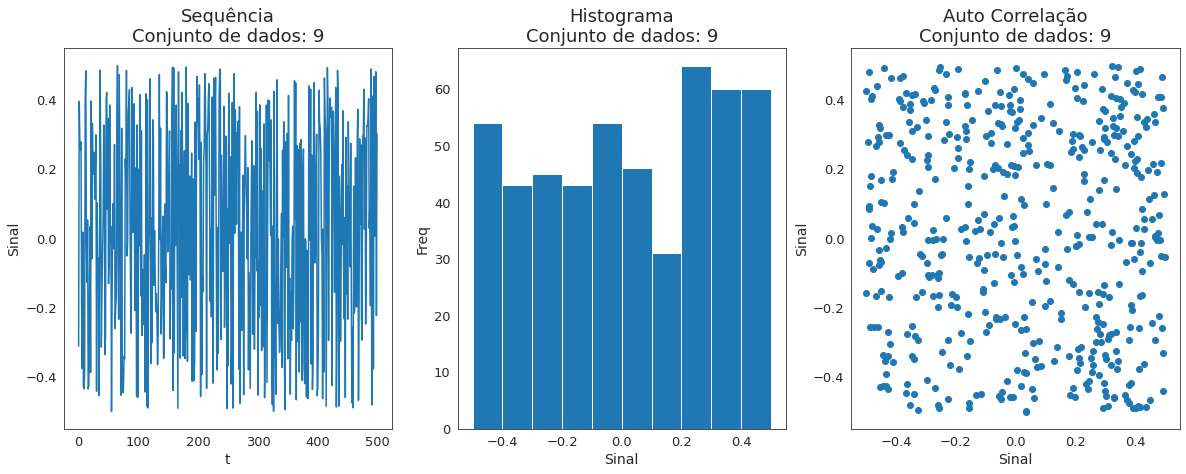

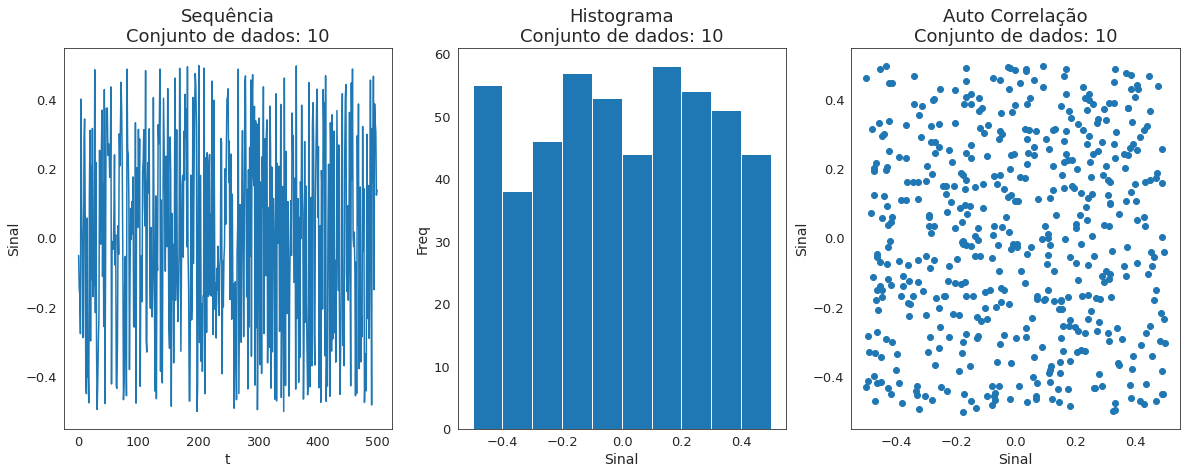

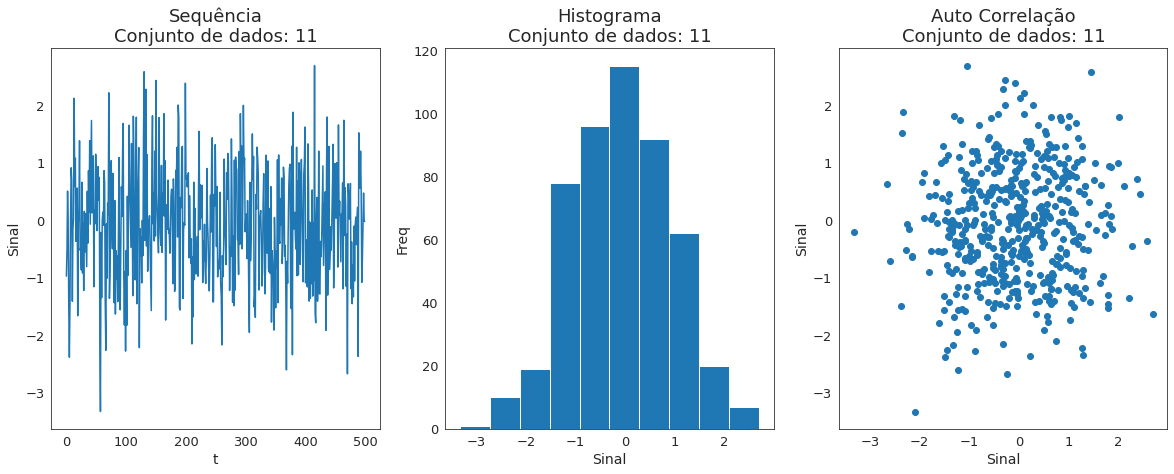

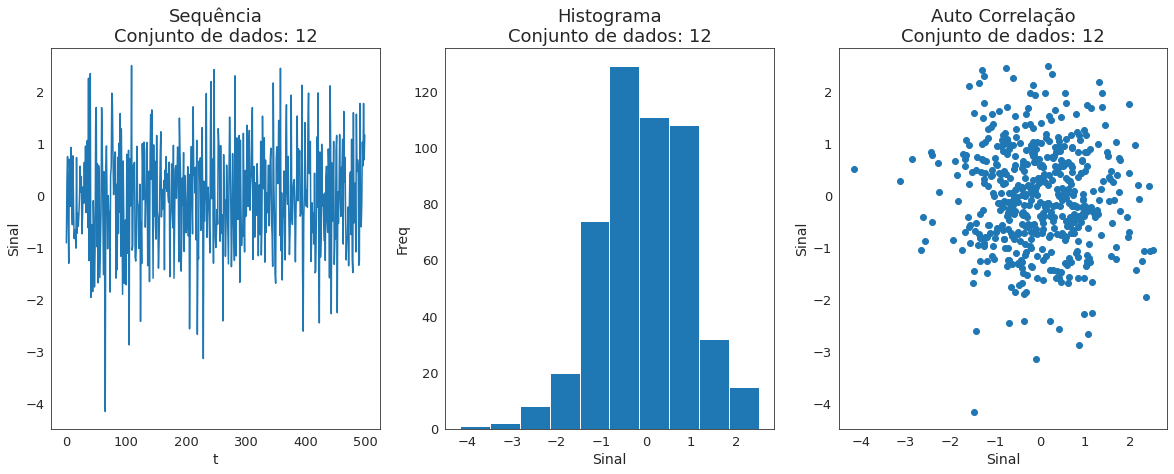

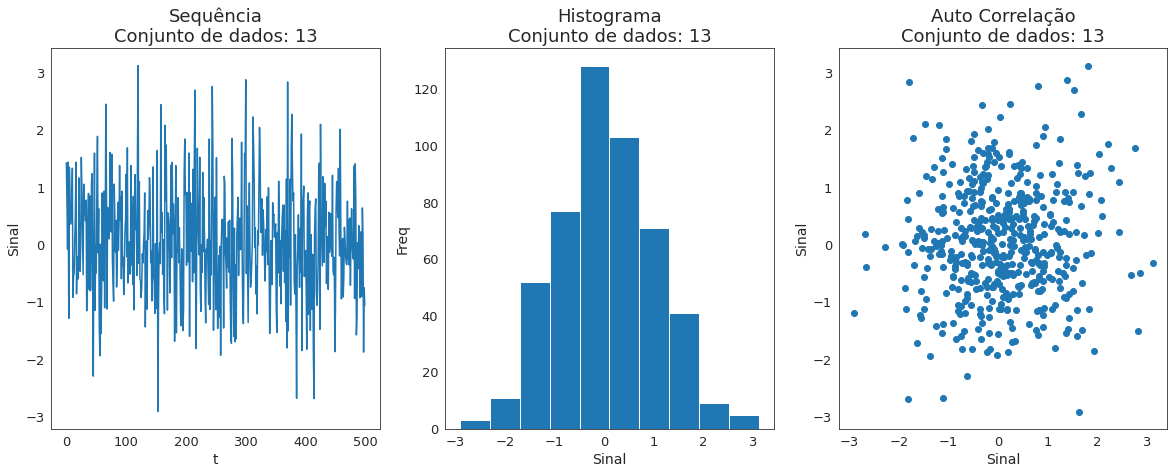

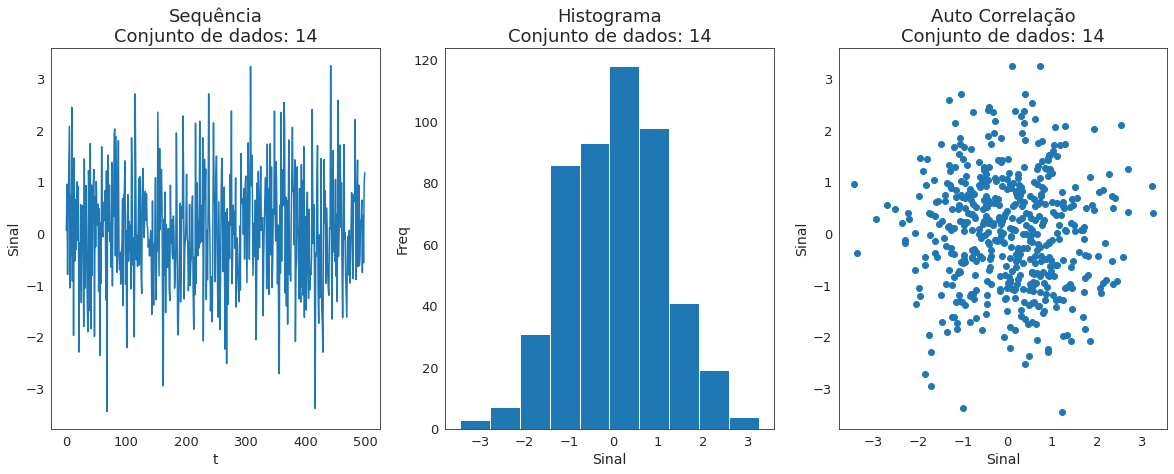

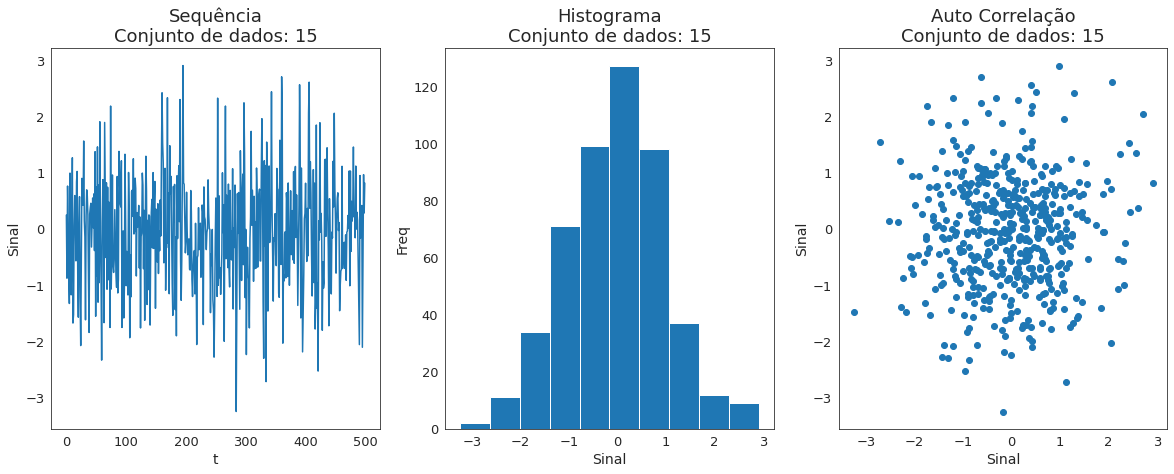

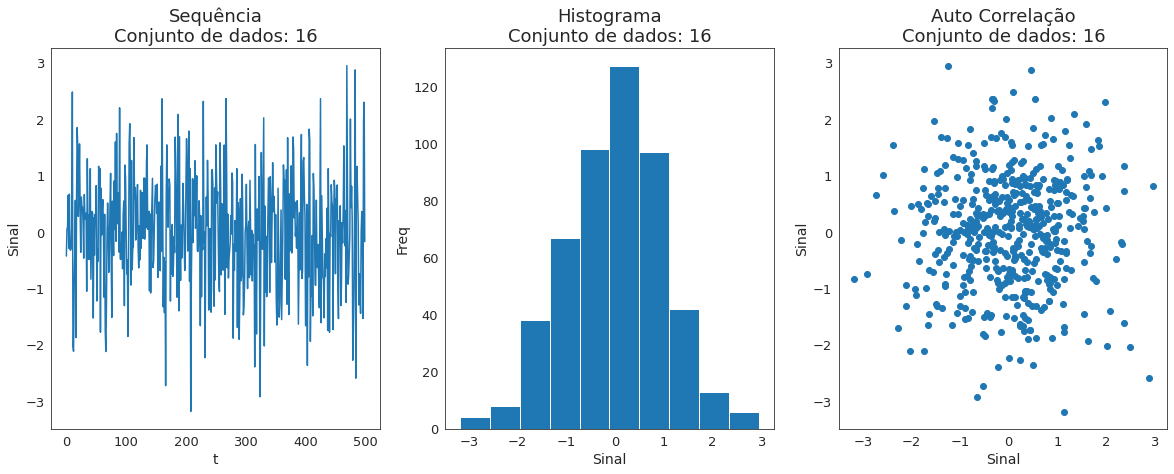

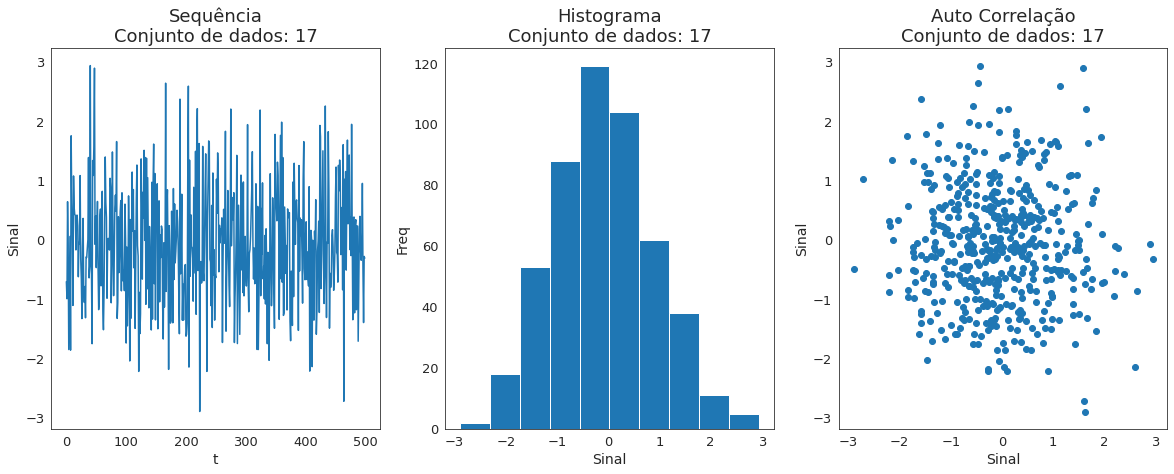

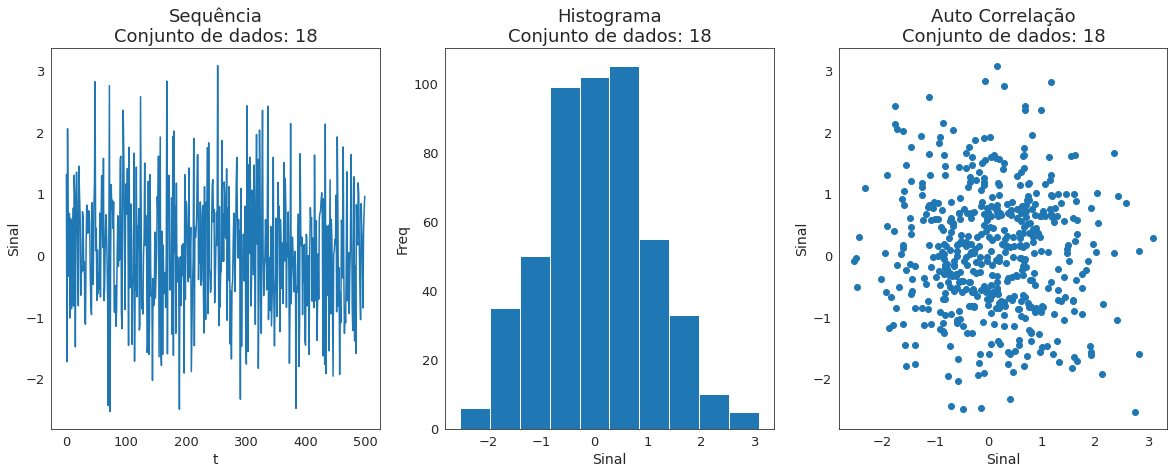

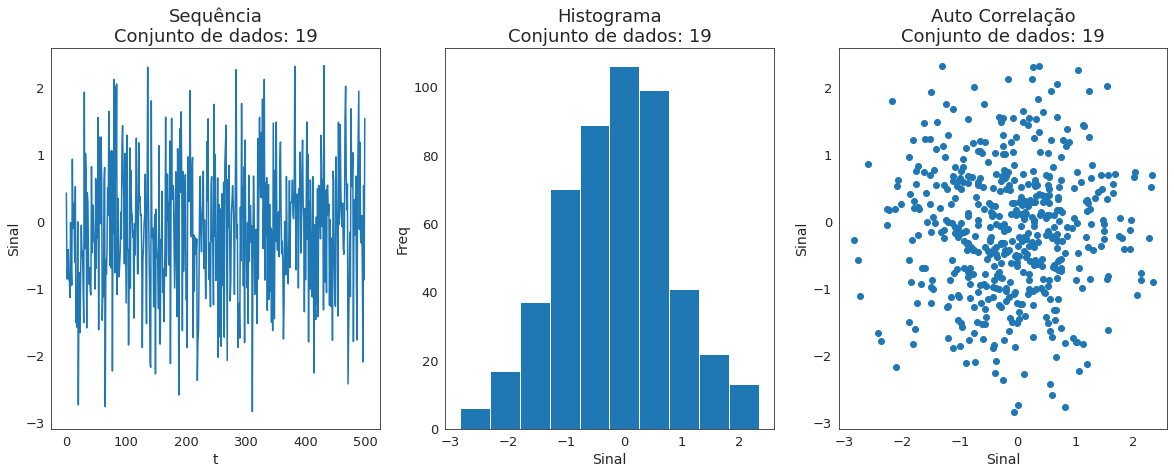

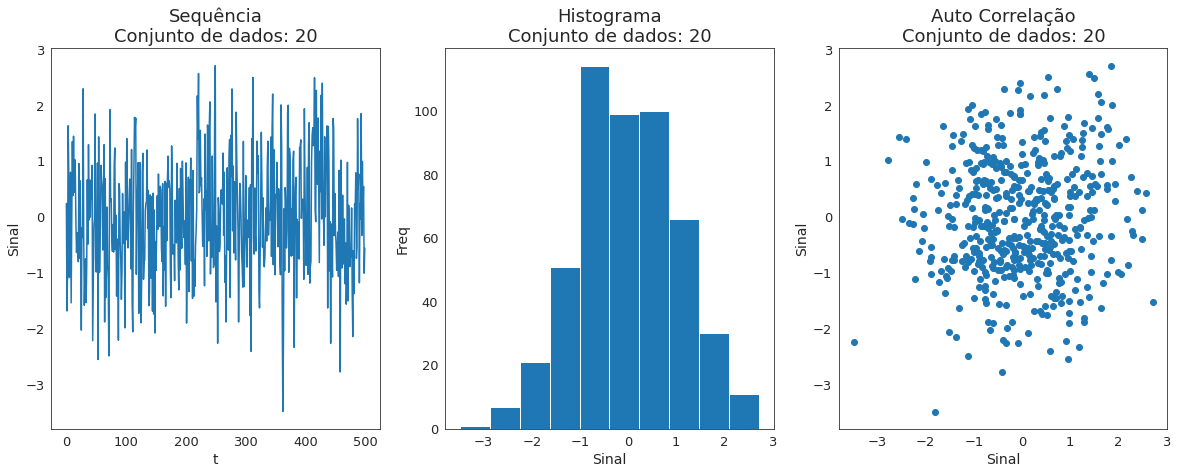

In [75]:
for i in np.arange(20):
    
    fig, axs = plt.subplots(1,3,  figsize = (20, 7))
    
    data = datas[i].to_numpy()
    x = np.arange(len(data))
    
    plt.sca(axs[0])

    plt.plot(x, data)
    
    plt.title(f'Sequência\nConjunto de dados: {i+1}')
    
    plt.xlabel('t')
    plt.ylabel('Sinal')
    
    plt.sca(axs[1])
    
    plt.hist(data)
    
    plt.title(f'Histograma\nConjunto de dados: {i+1}')
    
    plt.xlabel('Sinal')
    plt.ylabel('Freq')
    
    plt.sca(axs[2])
    
    plt.plot(data[:data.shape[0]-1], data[1:], 'o')
    
    plt.title(f'Auto Correlação\nConjunto de dados: {i+1}')
    
    plt.xlabel('Sinal')
    plt.ylabel('Sinal')
    
    plt.savefig(f"vs_{i}.png", dpi=150)

### Obter também algumas estatísticas dos valores em cada arquivo.

In [20]:
mm = []

for i in np.arange(20):
    
    data = datas[i]
    
    mm.append([data.min()[0],
               data.max()[0],
               data.median()[0],
               data.mean()[0],
               data.var(ddof=1)[0],
               np.corrcoef(data['x'].values[:499], data['x'].values[1:])[0,1]
              ])

mm = pd.DataFrame(mm, dtype=float, columns=['Min', 'Max', 'Mediana', 'Media', 'Var', 'corr'])
mm.index = np.arange(1, 21)

In [21]:
mm.T

1         2         3         4         5         6         7   \
Min     -0.499766 -0.495404 -0.495708 -0.494718 -0.499125 -0.494152 -0.499257   
Max      0.495341  0.497015  0.499329  0.498104  0.498088  0.499037  0.499778   
Mediana -0.026570 -0.007473  0.012626 -0.043456 -0.025385  0.017210  0.010728   
Media   -0.003232 -0.003458  0.014871 -0.021507 -0.005901  0.008580  0.001191   
Var      0.087101  0.083692  0.088516  0.078692  0.078841  0.080777  0.082067   
corr     0.021403 -0.009645  0.010846 -0.006954  0.057036 -0.117184  0.011763   

               8         9         10        11        12        13        14  \
Min     -0.498100 -0.499513 -0.499208 -3.320545 -4.149454 -2.903550 -3.437106   
Max      0.498735  0.499228  0.497105  2.697991  2.510935  3.125179  3.251335   
Mediana -0.002784  0.018246  0.001744 -0.065432 -0.072290  0.010895  0.089113   
Media   -0.001377  0.020742  0.001219 -0.071818 -0.036625  0.055967  0.042742   
Var      0.087916  0.089770  0.080259  0.985434  1.008111  0.949391  1.213293   
corr    -0.009118 -0.038984  0.044638  0.063947 -0.054674  0.050566 -0.040962   

               15        16        17        18        19        20  
Min     -3.240244 -3.178576 -2.888680 -2.525039 -2.825354 -3.483882  
Max      2.907237  2.958744  2.940906  3.087863  2.329836  2.711755  
Mediana -0.031212  0.066499 -0.109524  0.055689 -0.101911 -0.053230  
Media   -0.046774  0.013081 -0.067730  0.058912 -0.125249 -0.014661  
Var      0.988070  0.999978  0.976394  1.008297  0.961867  1.100450  
corr     0.024915  0.025836 -0.035986 -0.064586  0.004486  0.069223

In [69]:
a = mm.T.style.format("{:.2f}", na_rep="-")

In [70]:
a

###  A partir das informações assim obtidas, tentar identificar grupos entre os arquivos e propor um possível respectivo modelo capaz de gerar novos padrões com características semelhantes aos originais.

In [78]:
mm[:10].describe().style.format("{:.3f}", na_rep="-")

In [79]:
mm[10:].describe().style.format("{:.3f}", na_rep="-")

### **Análise**: Inicialmente, a partir da análise gráfica pelo histograma, observamos dois comportamentos distintos. Os primeiros 10 conjuntos de dados possuem pouca variabilidade em suas medidas, indicando que esses valores são constantes e sugerindo que sejam amostras de uma distribuição uniforme no intervalo [-0.5, 0.5]. Já para os 10 últimos conjuntos, sua distribuição no histograma aparenta ser uma normal(0, 1), e essa hipótese é corroborada pelo fato da variância das medidades de média, mediana e variância das amostras serem baixas, quando comparadas as das demais medidas. 

In [81]:
categoria_1 = np.random.uniform(-0.5, 0.5, 500)

In [82]:
categoria_2 = np.random.normal(0, 1, 500)

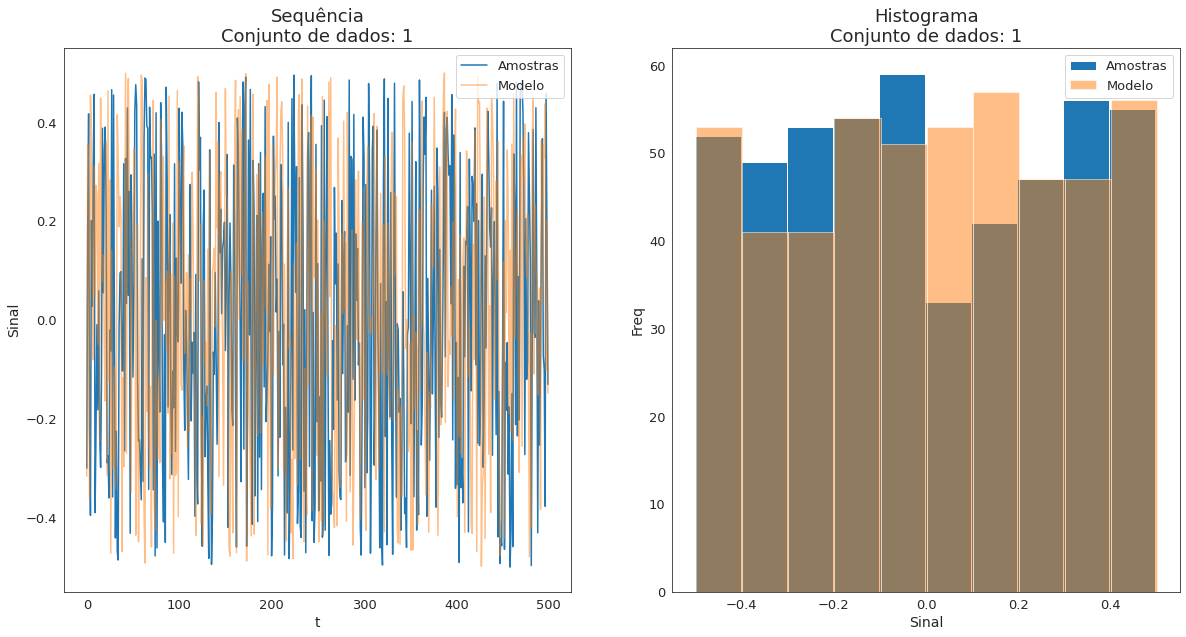

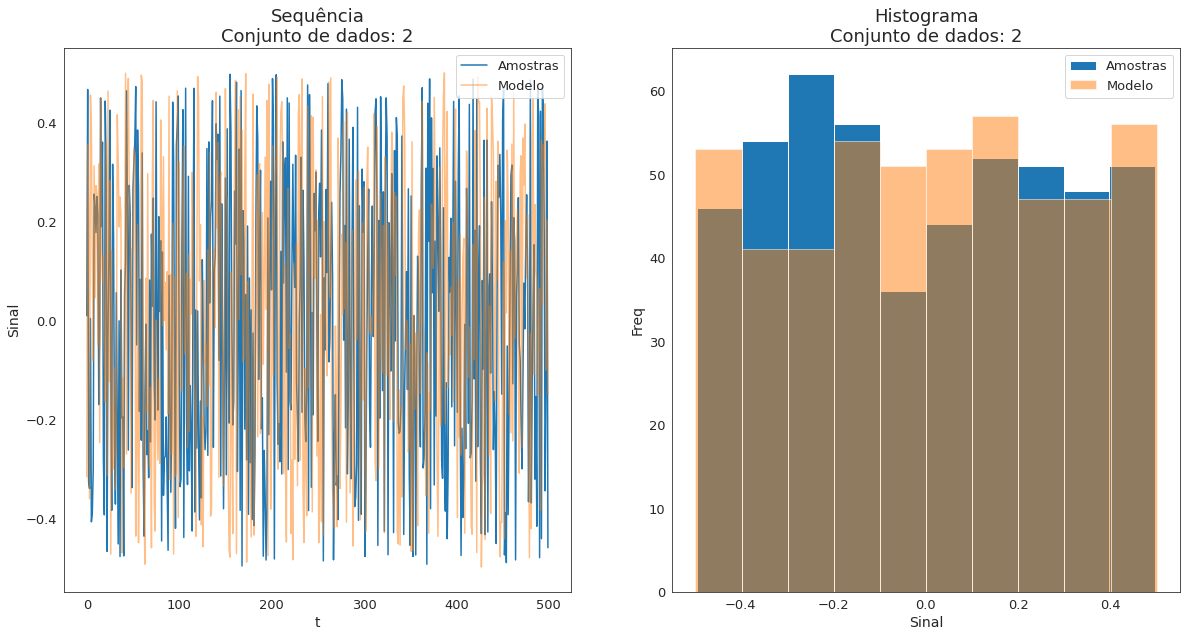

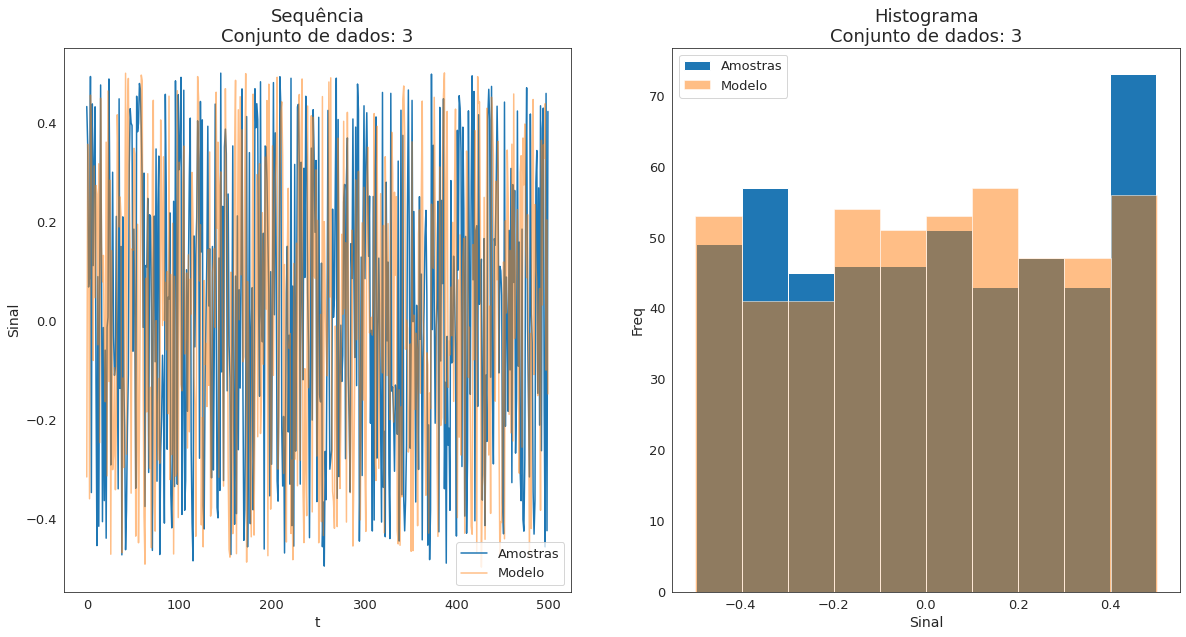

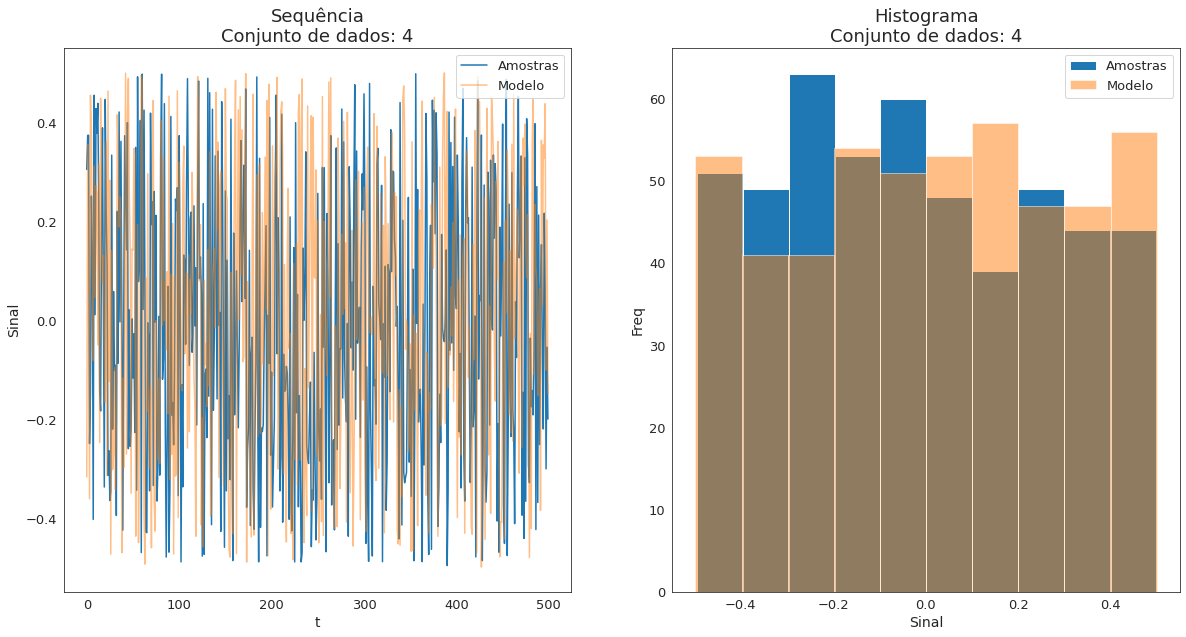

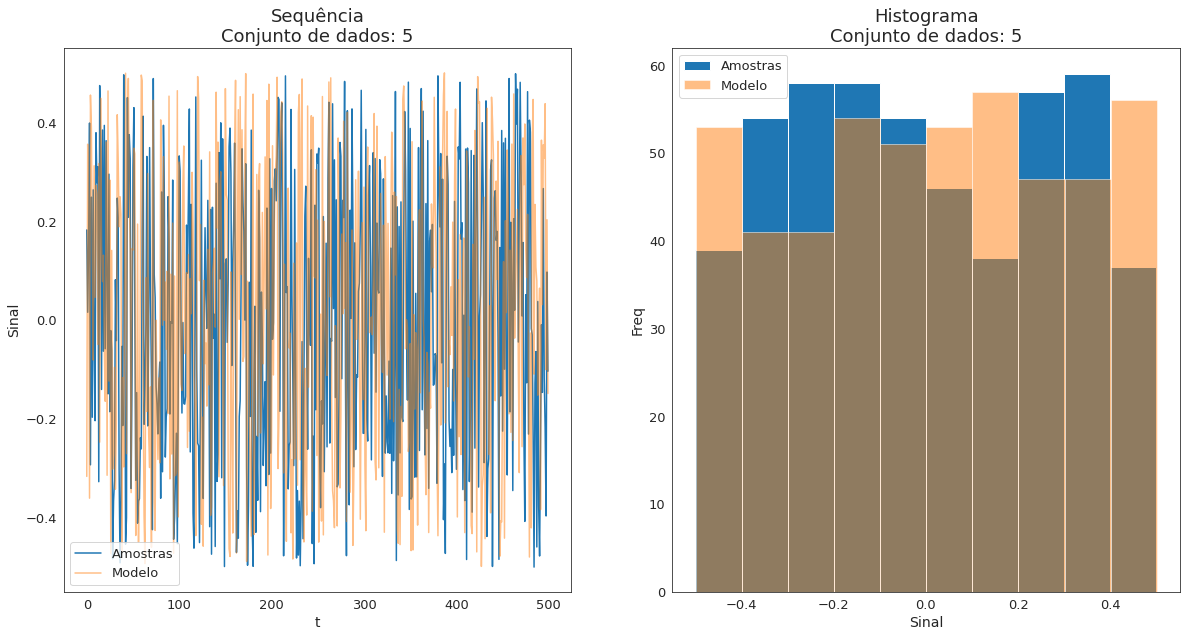

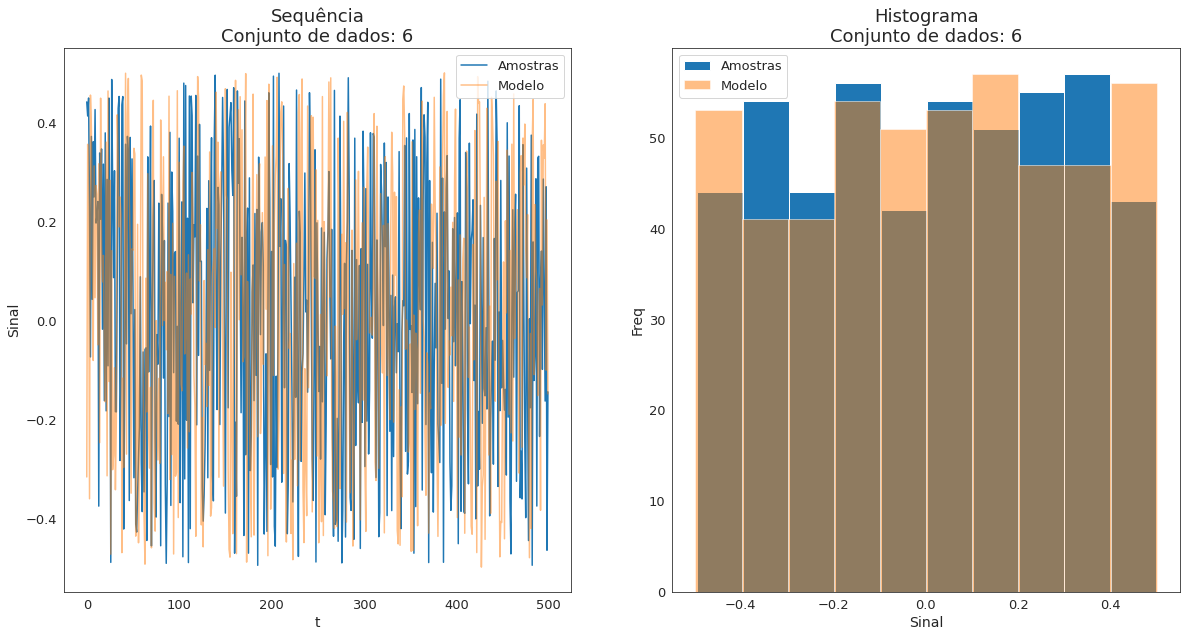

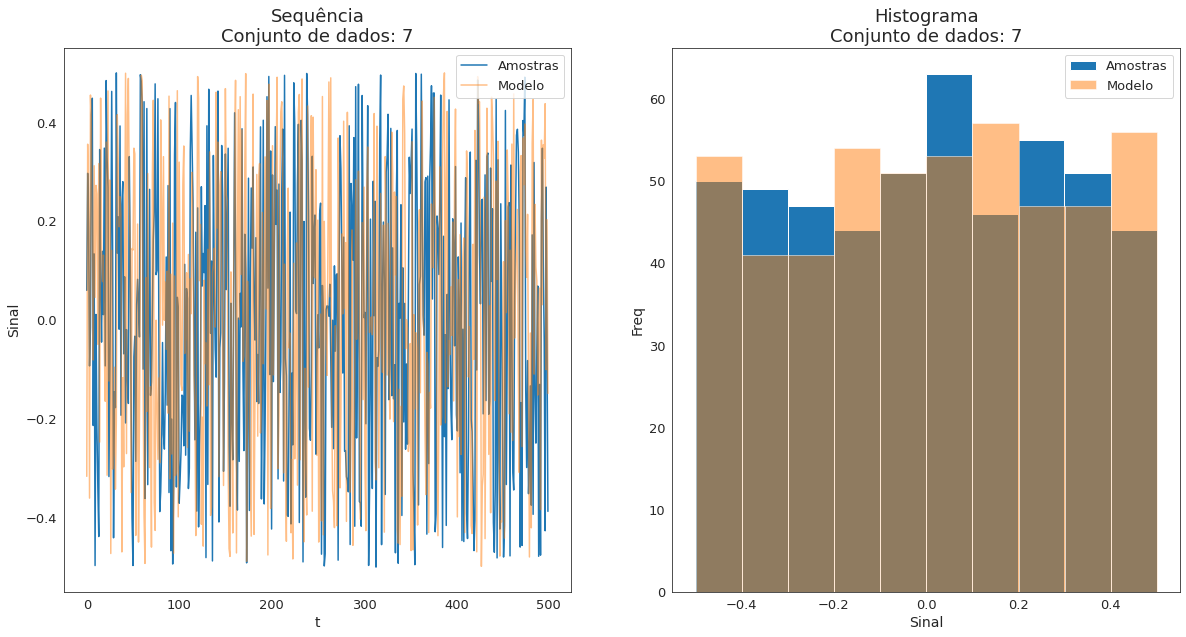

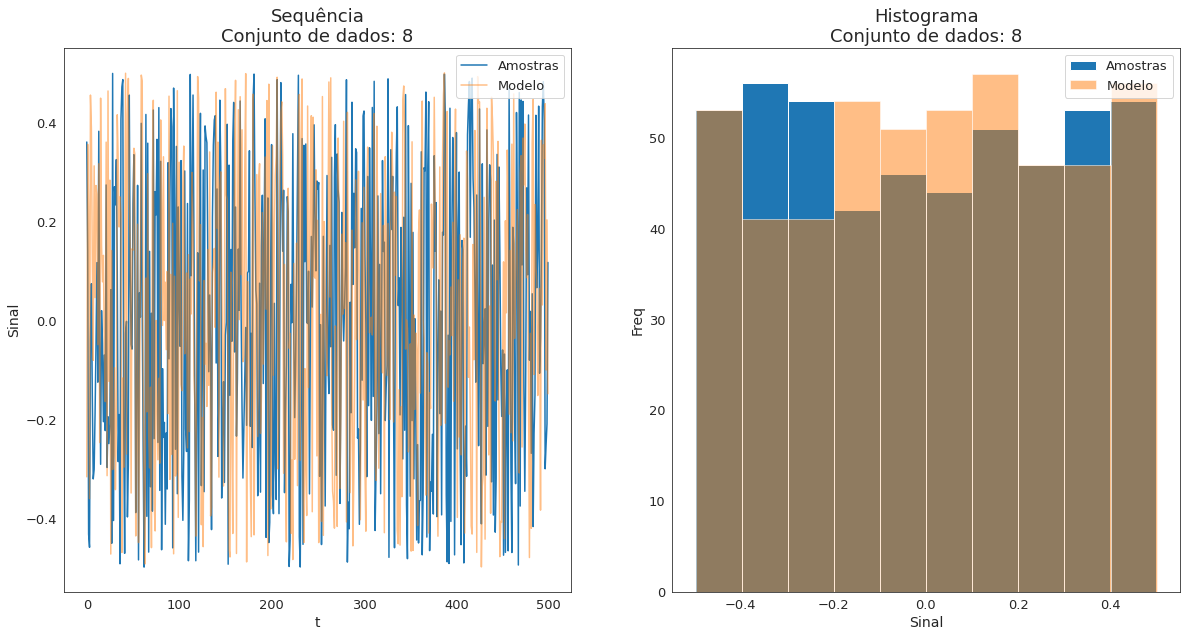

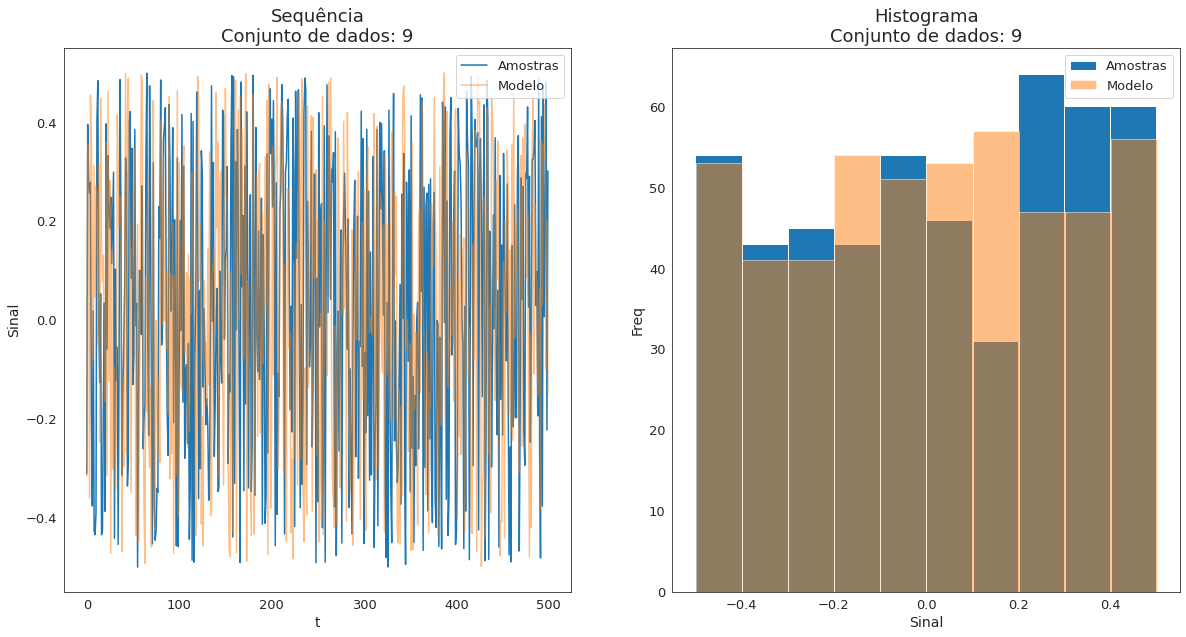

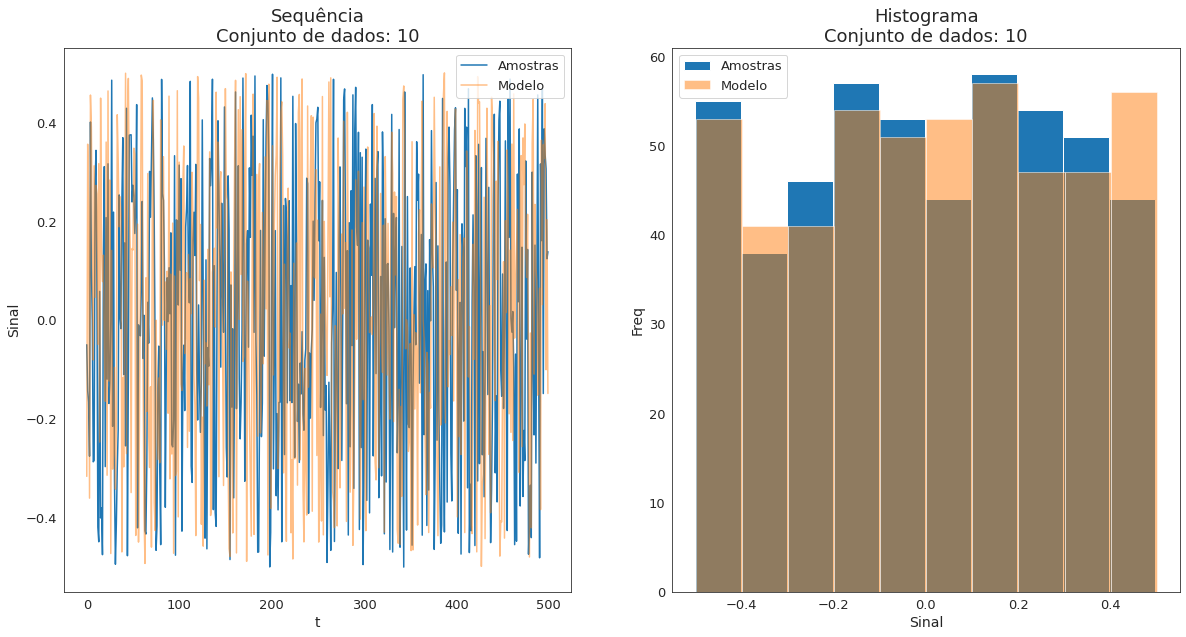

In [84]:

for i in np.arange(10):
    
    fig, axs = plt.subplots(1,2,  figsize = (20, 10))
    
    data = datas[i].to_numpy()
    x = np.arange(len(data))
    
    plt.sca(axs[0])
    plt.plot(x, data, label = 'Amostras')
    plt.plot(x, categoria_1, label = 'Modelo', alpha =0.5)
    
    plt.title(f'Sequência\nConjunto de dados: {i+1}')
    
    plt.xlabel('t')
    plt.ylabel('Sinal')
    
    plt.legend()
    
    plt.sca(axs[1])
    
    plt.hist(data, label = 'Amostras')
    plt.hist(categoria_1, label = 'Modelo', alpha =0.5)
    
    plt.title(f'Histograma\nConjunto de dados: {i+1}')
    
    plt.xlabel('Sinal')
    plt.ylabel('Freq')
    
    plt.legend()
    
    plt.savefig(f"vs2_{i}.png", dpi=150)

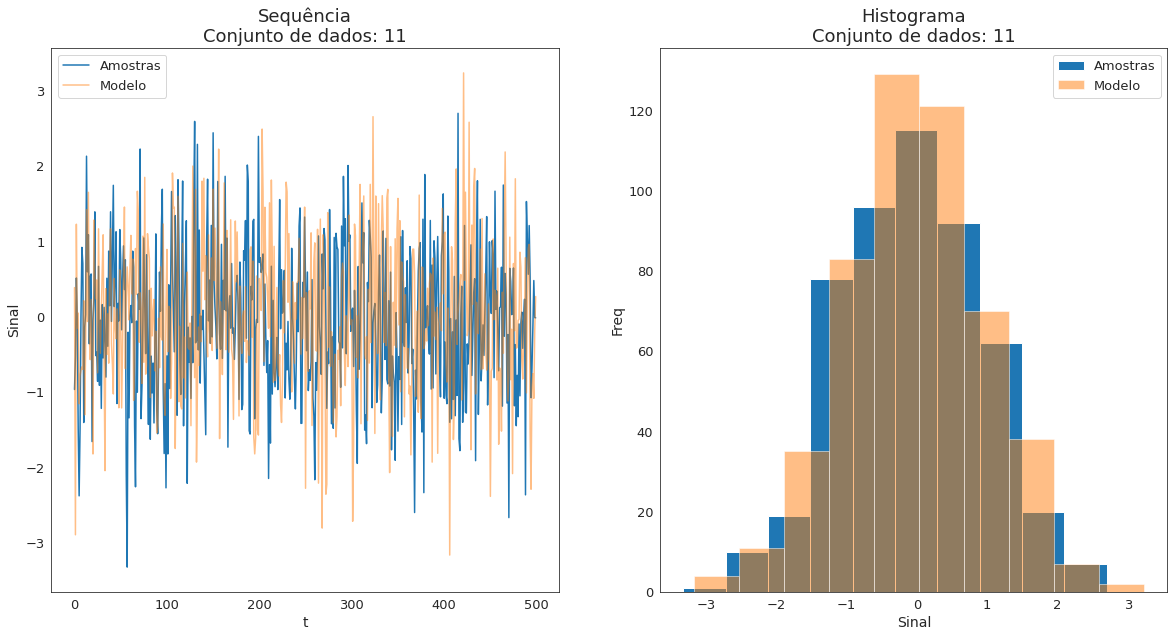

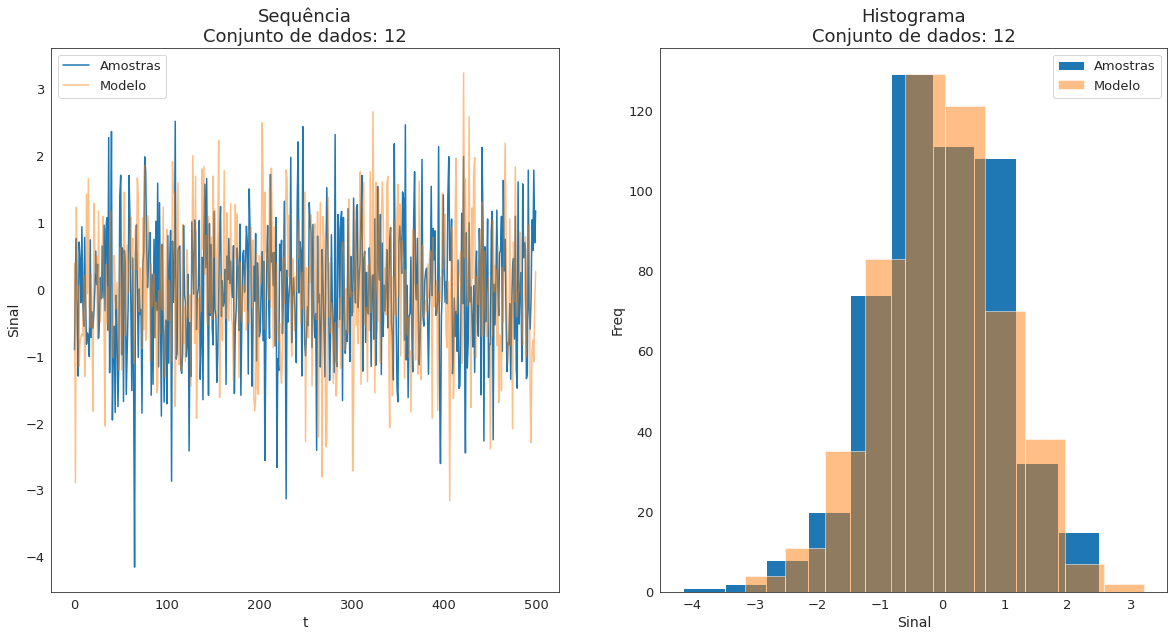

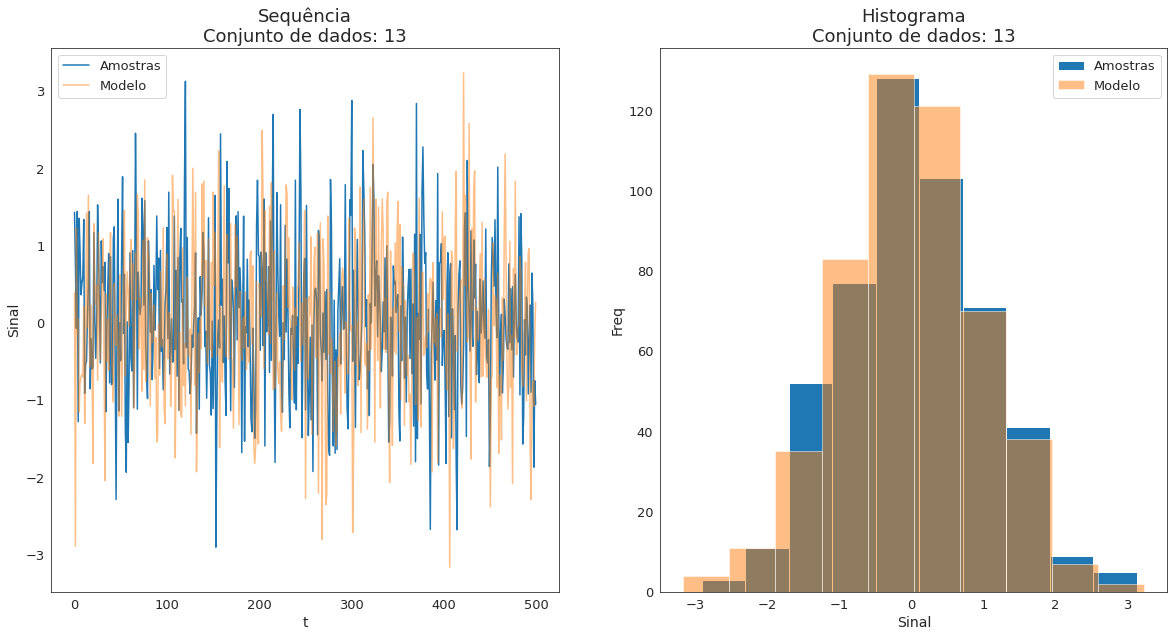

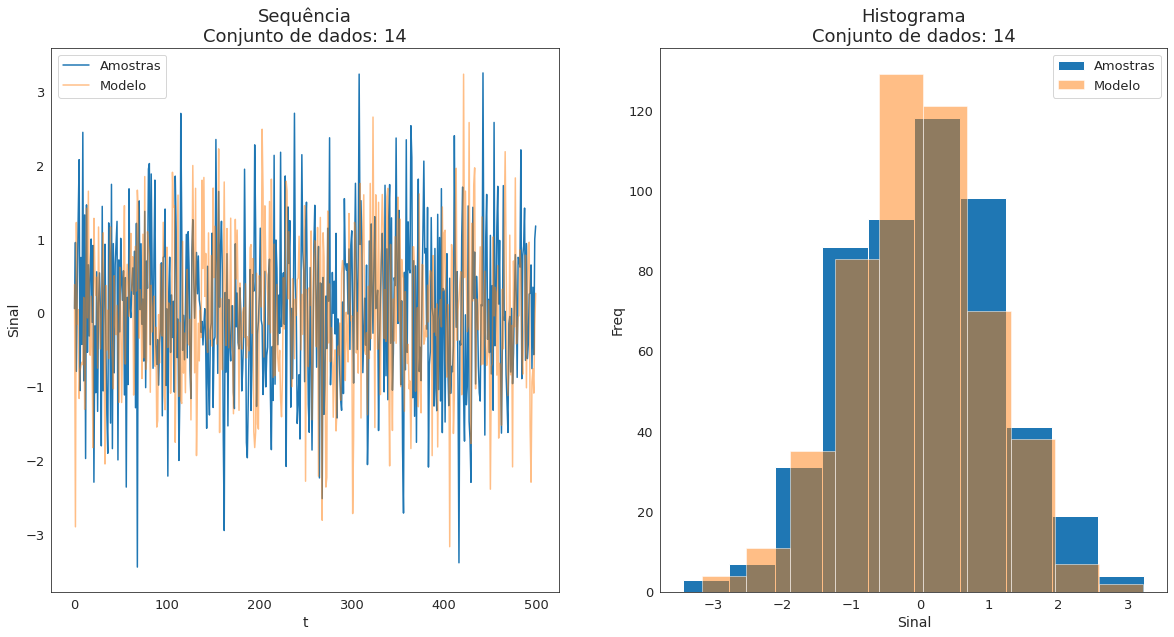

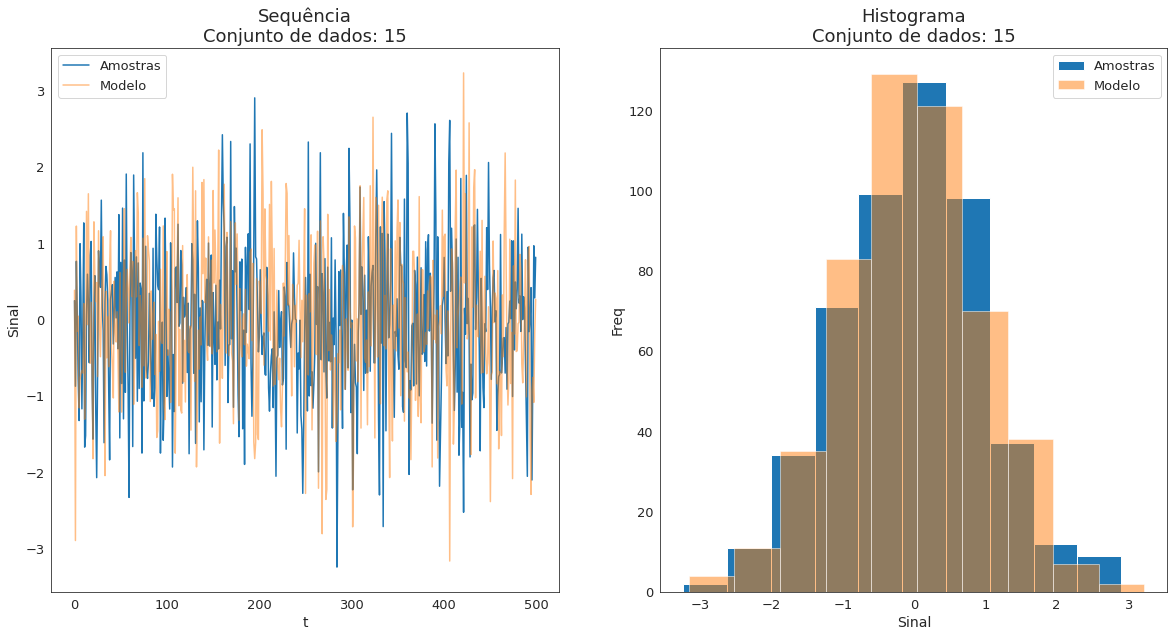

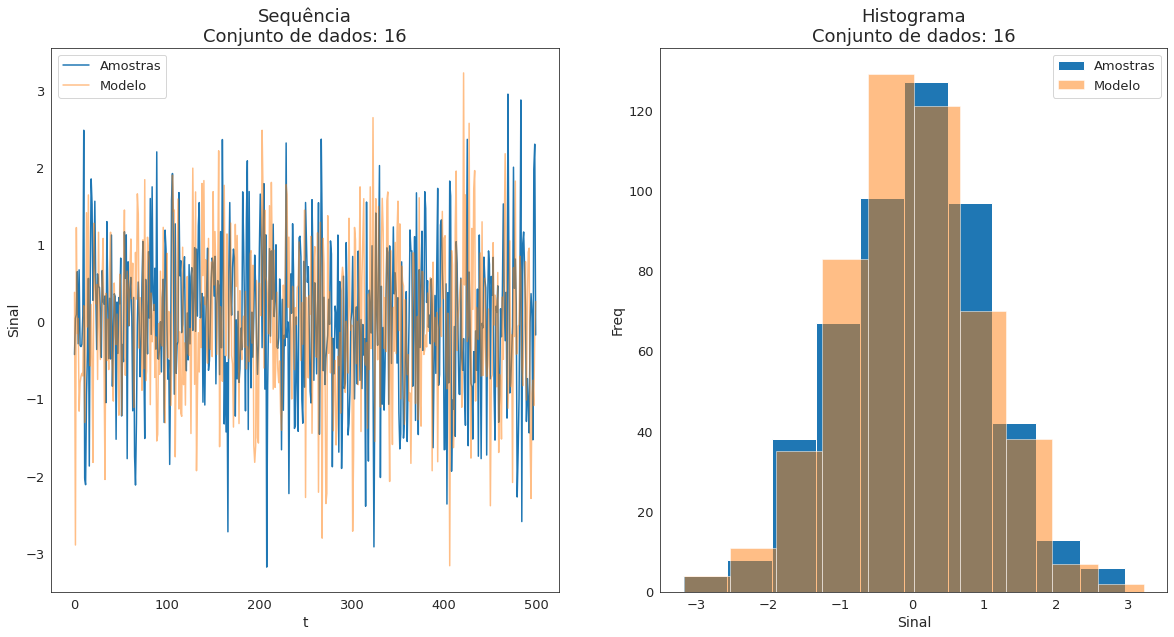

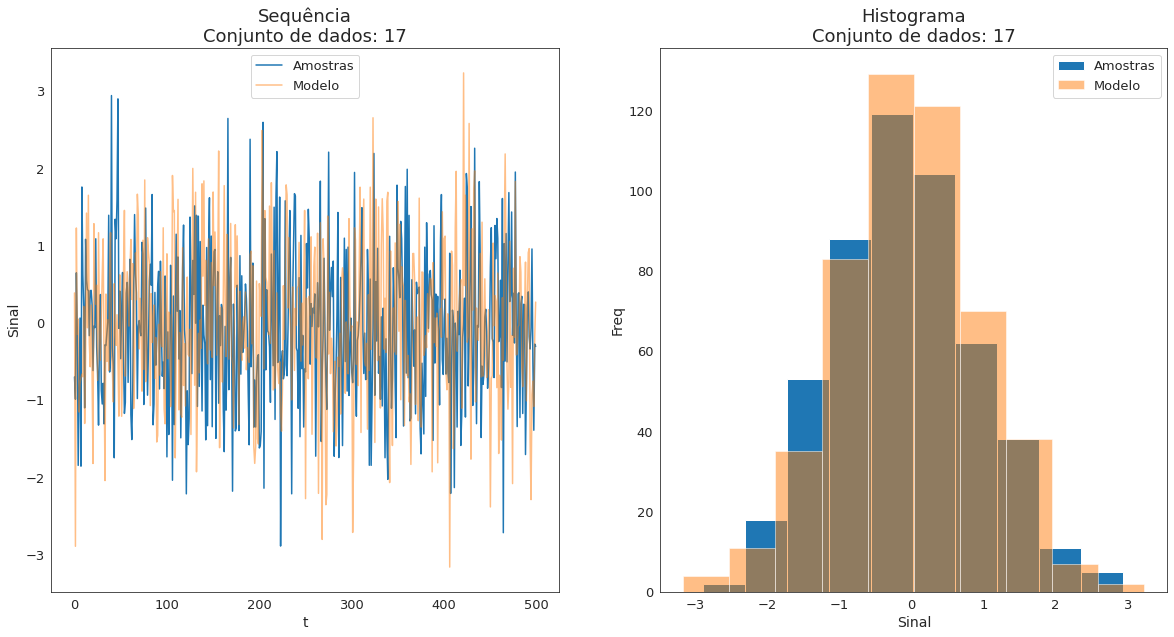

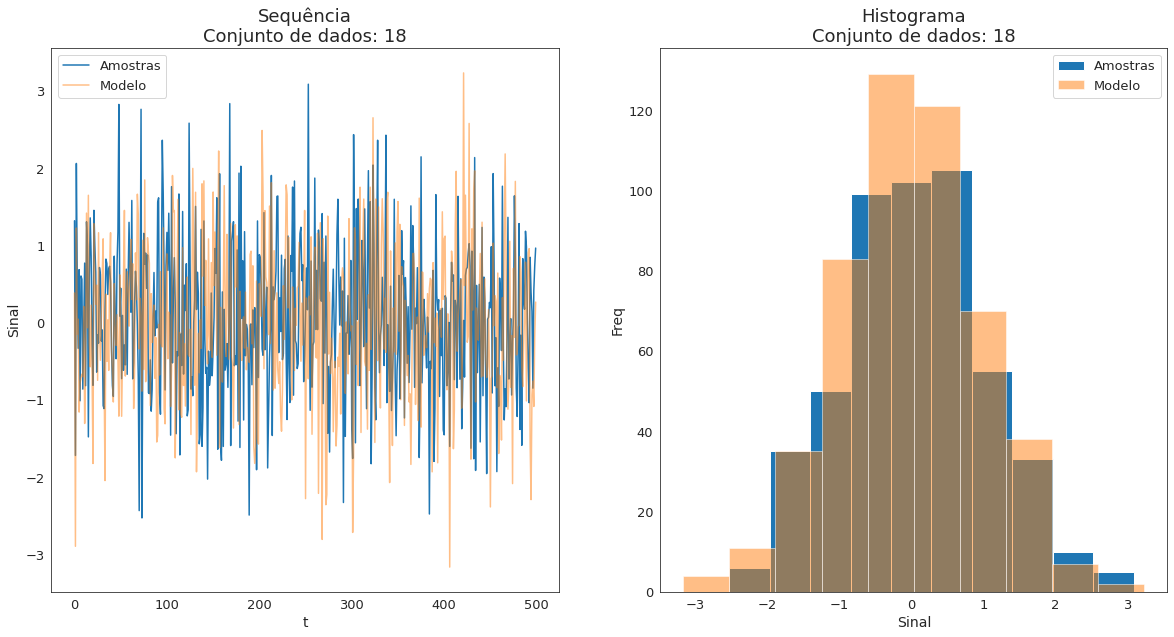

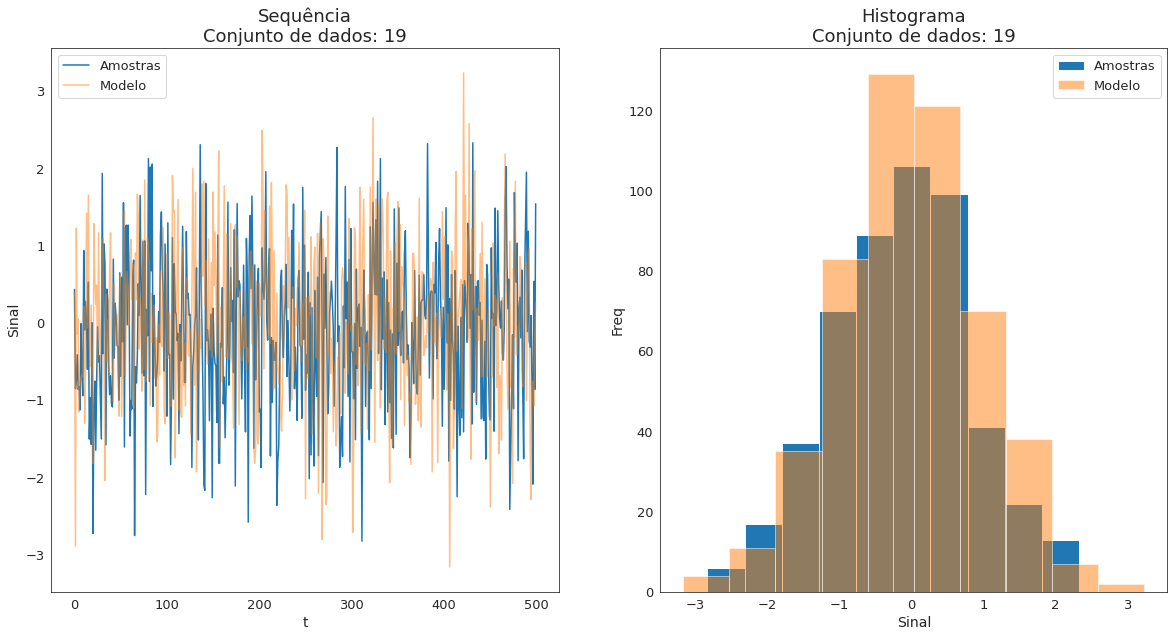

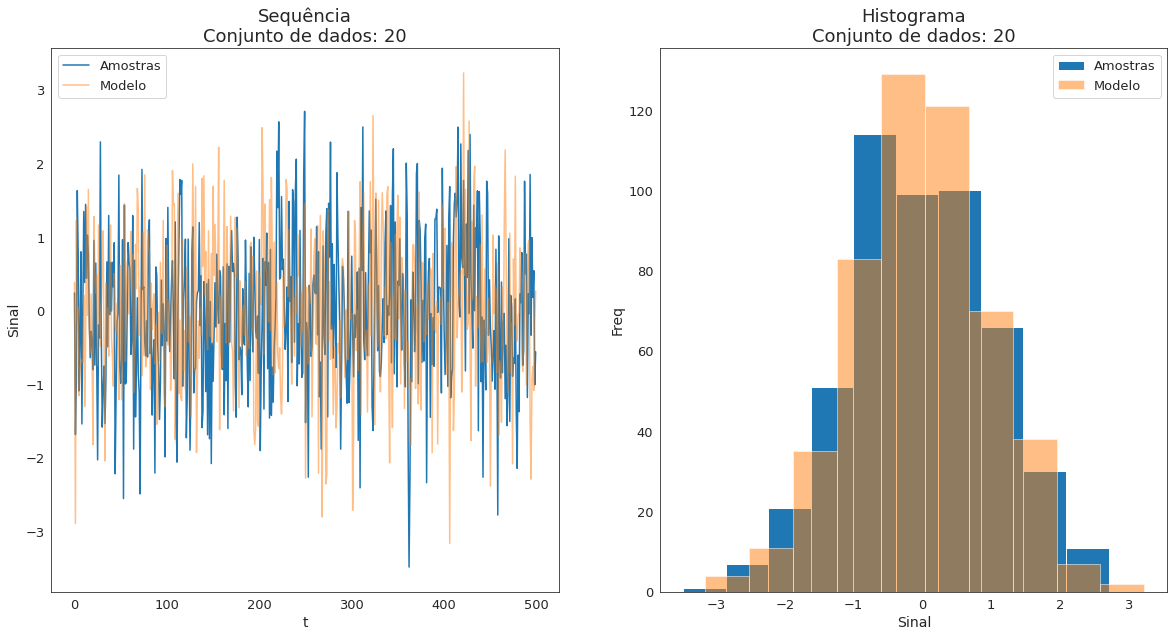

In [85]:
for i in np.arange(0,10):
    
    fig, axs = plt.subplots(1,2,  figsize = (20, 10))
    
    data = datas[i+10].to_numpy()
    x = np.arange(len(data))
    
    plt.sca(axs[0])
    plt.plot(x, data, label = 'Amostras')
    plt.plot(x, categoria_2, label = 'Modelo', alpha =0.5)
    
    plt.title(f'Sequência\nConjunto de dados: {i+11}')
    
    plt.xlabel('t')
    plt.ylabel('Sinal')
    
    plt.legend()
    
    plt.sca(axs[1])
    
    plt.hist(data, label = 'Amostras')
    plt.hist(categoria_2, label = 'Modelo', alpha =0.5)
    
    plt.title(f'Histograma\nConjunto de dados: {i+11}')
    
    plt.xlabel('Sinal')
    plt.ylabel('Freq')
    
    plt.legend()
    
    plt.savefig(f"vs2_{10+i}.png", dpi=150)

## Visualizar os dois tipos de sinais modelados também como imagens em níveis de cinza de 200 X 200 pixels.

In [87]:
categoria_1_img = np.random.uniform(0, 1, (200,200))
categoria_2_img = np.random.normal(0, 1, (200, 200))

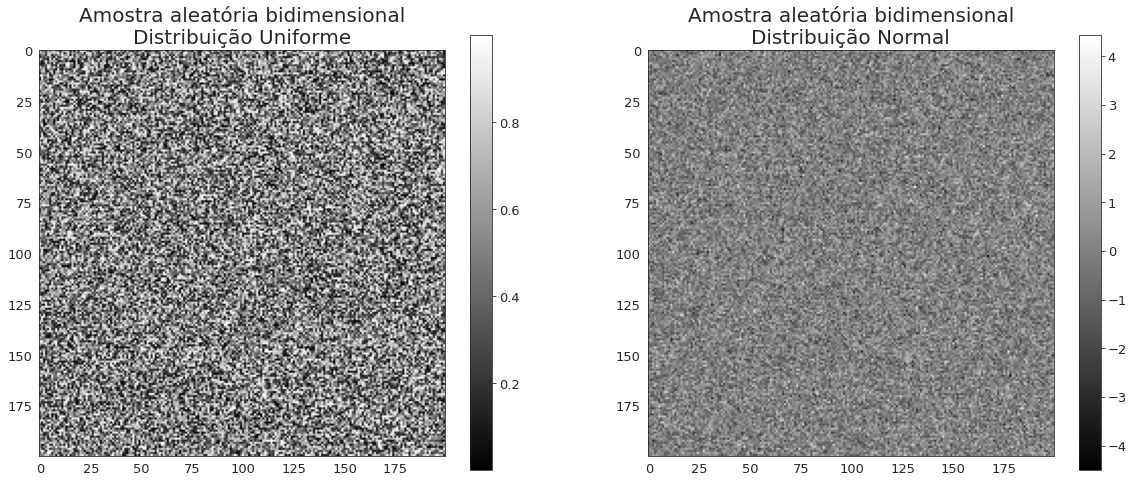

In [88]:
fig, axs = plt.subplots(1,2, figsize = (20, 8))

plt.sca(axs[0])
plt.title('Amostra aleatória bidimensional\nDistribuição Uniforme', fontsize=20)

plt.imshow(categoria_1_img, cmap = 'gray')
plt.colorbar()

plt.sca(axs[1])

plt.title('Amostra aleatória bidimensional\nDistribuição Normal', fontsize=20)

plt.imshow(categoria_2_img, cmap = 'gray')
plt.colorbar()

plt.savefig(f"img_sinal_{10+i}.png", dpi=150)

## **Blibliotecas**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [7]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

In [8]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]